In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [2]:
#importing the dataset

df = pd.read_csv('Market Basket Analysis.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
#Checking for null values..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


There are no null values

In [4]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [5]:
df.shape

(38765, 3)

In [6]:
#checking for unique values

df[['Member_number', 'Date', 'itemDescription']].nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [7]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

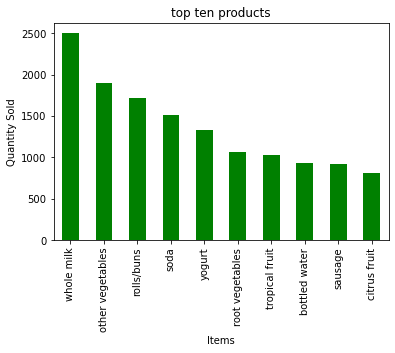

In [8]:
#top ten products purchased..

top_10 = df['itemDescription'].value_counts().sort_values(ascending=False)[0:10]

top_10.plot(kind='bar', color='green')
plt.title('top ten products')
plt.xlabel('Items')
plt.ylabel('Quantity Sold')

plt.tight_layout
plt.show()

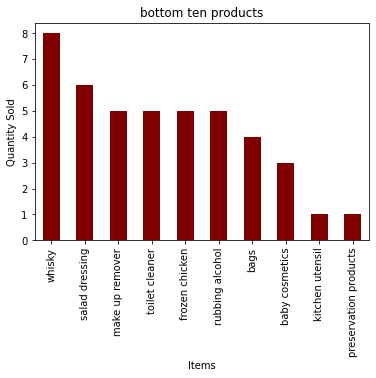

In [9]:
#bottom bottom items purchased..

bot_10 = df['itemDescription'].value_counts().sort_values(ascending=False)[-10:]

bot_10.plot(kind='bar', color ='maroon')
plt.title('bottom ten products')
plt.xlabel('Items')
plt.ylabel('Quantity Sold')

plt.tight_layout
plt.show()

# Data Preparation

In [10]:
#convert member_number to string datatype

df['Member_number'] = df['Member_number'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  object
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: object(3)
memory usage: 908.7+ KB


In [11]:
#combine the member_number and the date columns in order to create a 
#single column


df['combined_transaction'] = df['Member_number']+'_'+ df['Date']

df.head()

,Member_number,Date,itemDescription,combined_transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


# Creating a Pivot table

In [12]:
my_basket = pd.crosstab(df['combined_transaction'], df['itemDescription'])

my_basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
combined_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
my_basket.shape

(14963, 167)

In [14]:
#converting all positive values to 1 and everything else to 0. this
#is because, the algorithm of association analysis expects the values to be in 0 and 1


def my_code (x):
    if x <= 0:
        return 0
    if x >= 0:
        return 1
    
my_basket_sets = my_basket.applymap(my_code)

# Training my model

In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [16]:
#generating frequent item-pairs

frequent_pairs= apriori(my_basket_sets,  min_support=0.001, use_colnames=True)

C:\Users\user\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [17]:
#Generating rules

my_rules = association_rules(frequent_pairs, metric="lift")


In [18]:
my_rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-2.284679e-04,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-2.284679e-04,0.996168,-0.185312
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-4.726578e-04,0.996060,-0.201119
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-4.726578e-04,0.975443,-0.184234
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-1.544901e-04,0.992371,-0.121998
5,(sausage),(UHT-milk),0.060349,0.021386,0.001136,0.018826,0.880298,-1.544901e-04,0.997391,-0.126418
6,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
7,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
8,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
9,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891


In [19]:
my_rules.shape

(734, 10)

# Sort in descending order to know the product-pair with the highest frequency

In [20]:
my_rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
622,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
623,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
694,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
695,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
550,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
551,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
625,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
624,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


In [21]:
my_basket_sets[['whole milk', 'rolls/buns']].sum()

itemDescription
whole milk    2363
rolls/buns    1646
dtype: int64

`This means that of the 2363 persons who bought whole milk, 1646 of them also bought rolls/buns 

# Generating a heatmap visual

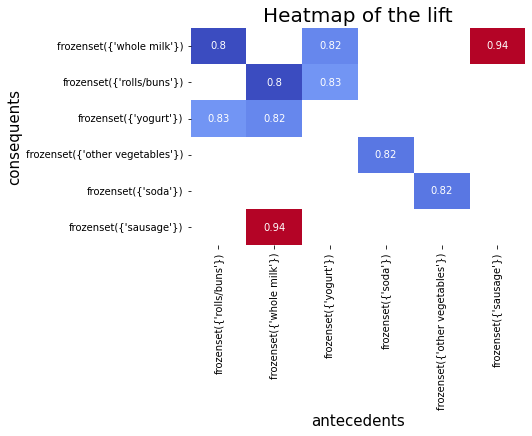

In [22]:
support_table = my_rules.sort_values(["support", "confidence", "lift"], axis = 0, ascending = False).head(10).pivot(index = 'consequents', columns = 'antecedents', values='lift')

sns.heatmap(support_table, annot = True, cmap='coolwarm', cbar=False)
plt.title('Heatmap of the lift', fontsize= 20)
plt.xlabel('antecedents', fontsize= 15)
plt.ylabel('consequents', fontsize= 15)
plt.show()

# Making Recommendations

From the results displayed; the top products-pair likely to be purchased
are;
- Whole milk and Sausage.
- Rolls/buns and Youghurt,
- Whole milk and Yoghurt
- Soda and vegetables
